In [1]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

# Datasets

In [3]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True
)

# Encoder

In [4]:
encoder = info.features['text'].encoder

print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [5]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [6]:
for ts in encoded_string:
    print('{} ----> {}'.format(ts, encoder.decode([ts])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


# Samples

In [10]:
for train_example, train_label in train_data.take(1):
    print('Decoded text:', encoder.decode(train_example)[:60])
    print('Encoded text:', train_example[:10].numpy())
    print('Label:', train_label.numpy())

Decoded text: I have no idea what the other reviewer is talking about- thi
Encoded text: [  12   31   84  480   71    1  108 7748    9 1130]
Label: 1


In [7]:
encoder.decode(train_example)

NameError: name 'train_example' is not defined

# Model

In [11]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32, train_data.output_shapes))

In [12]:
for example_batch, label_batch in train_batches.take(2):
    print("Batch shape:", example_batch.shape)
    print("label shape:", label_batch.shape)

Batch shape: (32, 885)
label shape: (32,)
Batch shape: (32, 1359)
label shape: (32,)


In [14]:
# caution: no masking!
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training

In [16]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


782/782 [==============================] - 38s 48ms/step - loss: 0.6806 - accuracy: 0.6188 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 14s 18ms/step - loss: 0.6172 - accuracy: 0.7587 - val_loss: 0.5903 - val_accuracy: 0.7865
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.5399 - accuracy: 0.8072 - val_loss: 0.5298 - val_accuracy: 0.7990
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4715 - accuracy: 0.8410 - val_loss: 0.4733 - val_accuracy: 0.8500
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4202 - accuracy: 0.8634 - val_loss: 0.4313 - val_accuracy: 0.8573
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3790 - accuracy: 0.8764 - val_loss: 0.3994 - val_accuracy: 0.8594
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3488 - accuracy: 0.8847 - val_loss: 0.3748 - val_accuracy: 0.8646
Ep

# Results

In [20]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

    782/Unknown - 2s 3ms/step - loss: 0.3333 - accuracy: 0.8735Loss:  0.33332149180419307
Accuracy:  0.87352


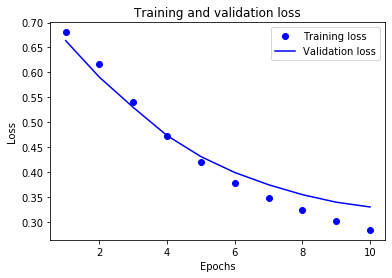

In [21]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

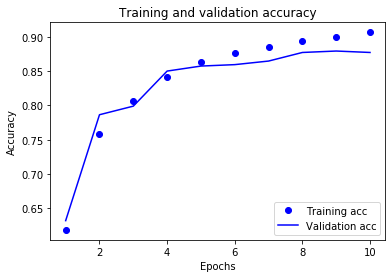

In [22]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()